In [267]:
#SALAMI FAMOUS
#salamifamous@gmail.com

In [268]:
#Import of libraries/packages

#pandas was used to read the figma CSV data
import pandas as pd
import numpy as npy

#matplot is needed to plot graphs for visualization
import matplotlib.pyplot as plt

#sklearn is needed to build the training and testing model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#prophet needed for prediction/forecasting
from prophet import Prophet

#needed for colour selection
import seaborn as sns
color_pal = sns.color_palette()


In [269]:
#Reads the Figma Data
figmadata = pd.read_csv("data/figma-views-20220101-20220823.csv", parse_dates=["Date"], index_col='Date')

In [270]:
#Analyses first the data

pageViews = figmadata[figmadata.columns[0]]
figmadata.head();

In [271]:
#Checks for missing data
figmadata.isnull().sum();

In [272]:
figmadata.index = pd.to_datetime(figmadata.index, format='%d-%m-%Y')

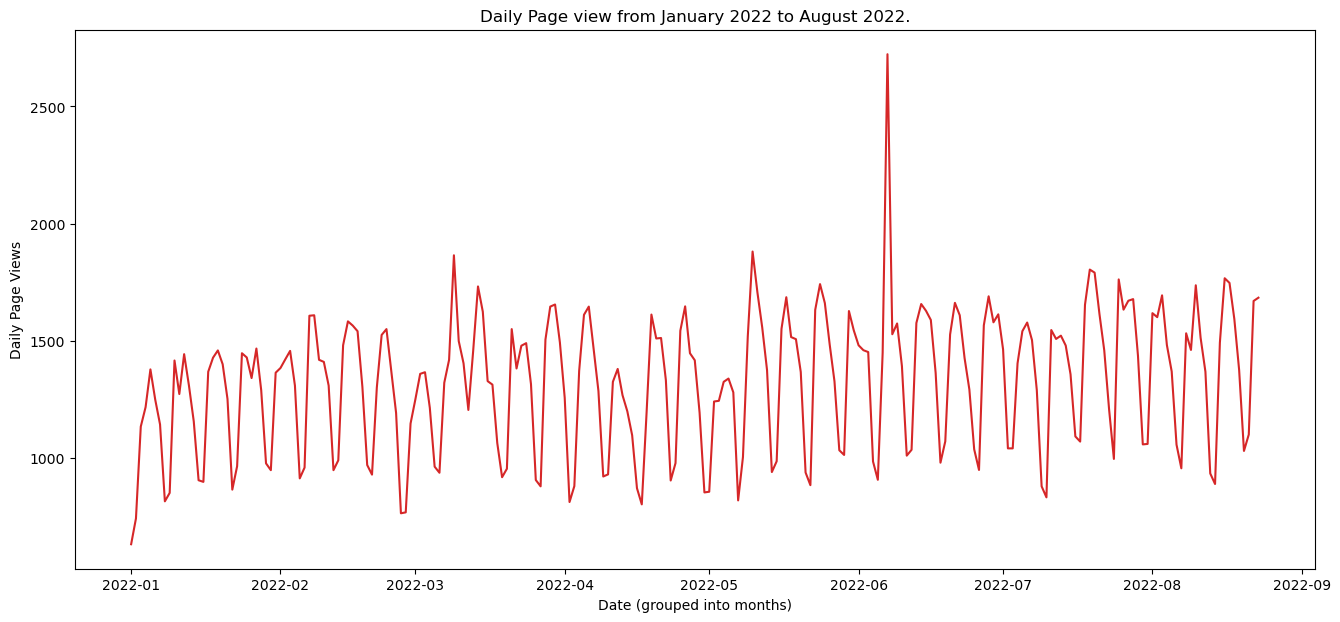

In [273]:
# Draw Plot to Visualize the Time Series of available Figma Data

def plot_df(figmadata, x, y, title="", xlabel='Date (grouped into months)', ylabel="Daily Page Views", dpi=100):
    plt.figure(figsize=(16,7), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(figmadata, x=figmadata.index, y=pageViews, title='Daily Page view from January 2022 to August 2022.')    

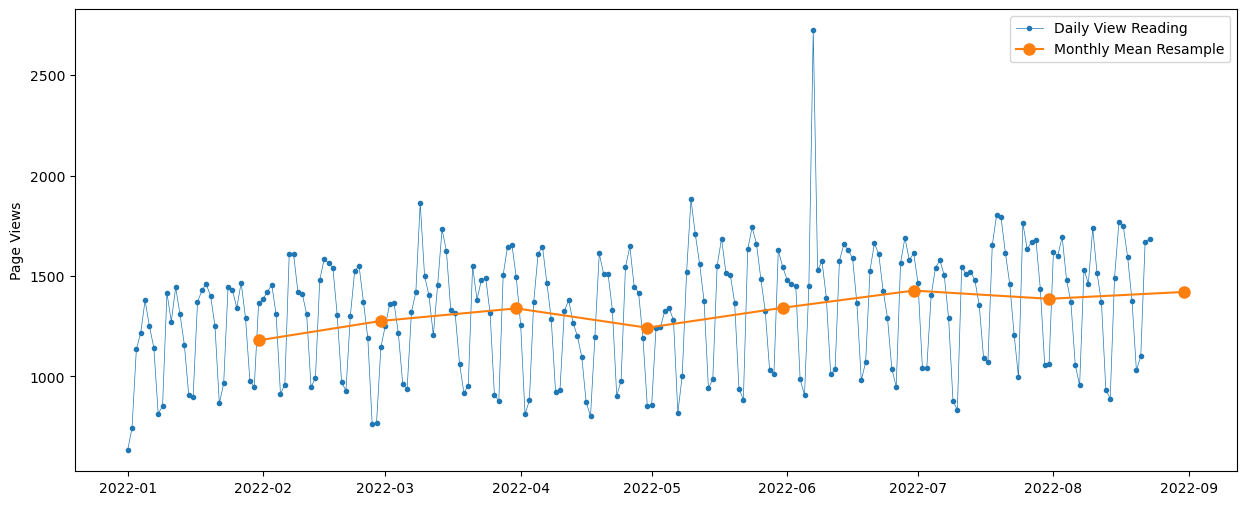

In [274]:
#Visualization of dataset, showing Mean

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(pageViews,marker='.', linestyle='-', linewidth=0.5, label='Daily View Reading')
ax.plot(pageViews.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Page Views')
ax.legend();

In [275]:
# To read the number of entries and columns
figmadata.shape;

In [276]:
#Dataframe Restructuring to suit the package I'm using for the prediction

figmadata['y'] = figmadata['Figma (software)']
figmadata['ds'] = figmadata.index
figmadata.drop(['Figma (software)'], axis=1, inplace=True)
figmadata.head()

,y,ds
Date,,
2022-01-01,632,2022-01-01
2022-01-02,742,2022-01-02
2022-01-03,1134,2022-01-03
2022-01-04,1217,2022-01-04
2022-01-05,1378,2022-01-05


In [277]:
#Training and Testing the Data Split

predSize = 94 # 40% of observations
train, test = train_test_split(figmadata, test_size = predSize/len(figmadata), shuffle=False)
train.tail();

In [278]:
test.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2022-05-22 to 2022-08-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       94 non-null     int64         
 1   ds      94 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


In [279]:
#Training the model using the facebook forecasting library

tmodel = Prophet(daily_seasonality = True,  seasonality_prior_scale=0.8)
tmodel.fit(train);

07:03:27 - cmdstanpy - INFO - Chain [1] start processing
07:03:27 - cmdstanpy - INFO - Chain [1] done processing


In [280]:
#Future prediction for a period of 94 days from the training data selected

mfuture = tmodel.make_future_dataframe(periods=predSize)
mfuture

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
230,2022-08-19
231,2022-08-20
232,2022-08-21
233,2022-08-22


In [281]:
#Future forecast using the trained model

forecast = tmodel.predict(mfuture)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,739.498221,634.180891,967.228925,739.498221,739.498221,51.496609,51.496609,51.496609,422.800646,422.800646,422.800646,-371.304038,-371.304038,-371.304038,0.0,0.0,0.0,790.994830
1,2022-01-02,742.305251,673.598933,1017.163791,742.305251,742.305251,91.992964,91.992964,91.992964,422.800646,422.800646,422.800646,-330.807683,-330.807683,-330.807683,0.0,0.0,0.0,834.298215
2,2022-01-03,745.112280,1142.827116,1452.150377,745.112280,745.112280,560.131126,560.131126,560.131126,422.800646,422.800646,422.800646,137.330480,137.330480,137.330480,0.0,0.0,0.0,1305.243407
3,2022-01-04,747.919310,1235.756028,1546.414954,747.919310,747.919310,644.418992,644.418992,644.418992,422.800646,422.800646,422.800646,221.618345,221.618345,221.618345,0.0,0.0,0.0,1392.338302
4,2022-01-05,750.726340,1220.819073,1533.825806,750.726340,750.726340,635.854785,635.854785,635.854785,422.800646,422.800646,422.800646,213.054138,213.054138,213.054138,0.0,0.0,0.0,1386.581125


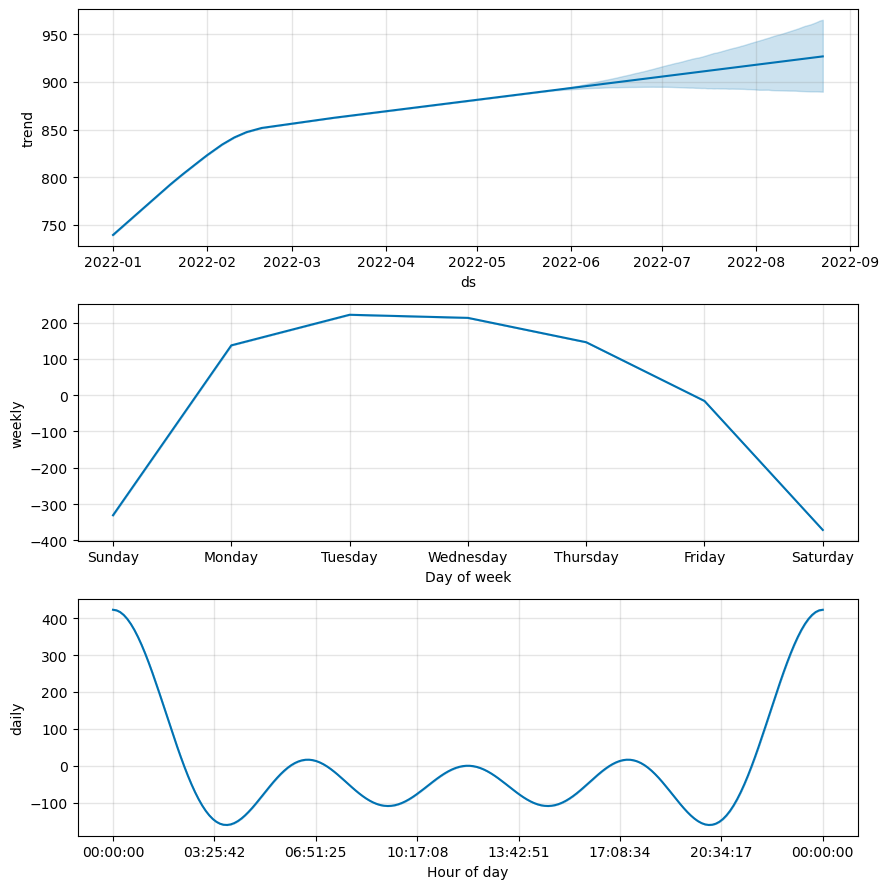

In [282]:
#I need to plot this graph to show the trend or progression of the page views monthly, daily and hourly
#We can see how the trend (page views) behaves, rising and falling depending on the visualizations shown in the graph below
#Graph 1 - Shows the rise in views in the beginning of 2022, skewed in the middle of February and March and then peaked again from March
#Graph 2 - Mondays to Thursdays show higher page views while it declines on weekends
#Graph 3- Shows hourly view rates

tmodel.plot_components(forecast);

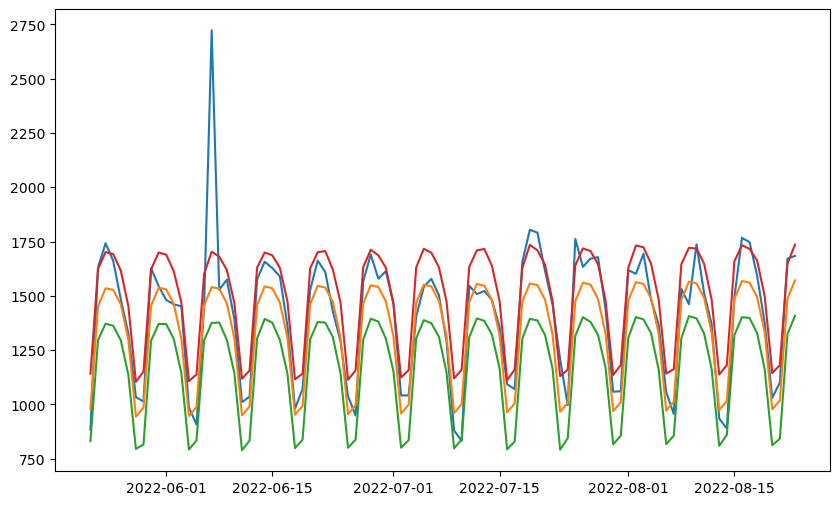

In [283]:
#We want to see the prediction from the 94th day till the end
prediktion = forecast.iloc[-predSize:, :]


plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'])
plt.plot(prediktion['ds'], prediktion['yhat'], color=color_pal[1]) # This shows the average views
plt.plot(prediktion['ds'], prediktion['yhat_lower'], color=color_pal[2])
plt.plot(prediktion['ds'], prediktion['yhat_upper'], color=color_pal[3])
plt.show()

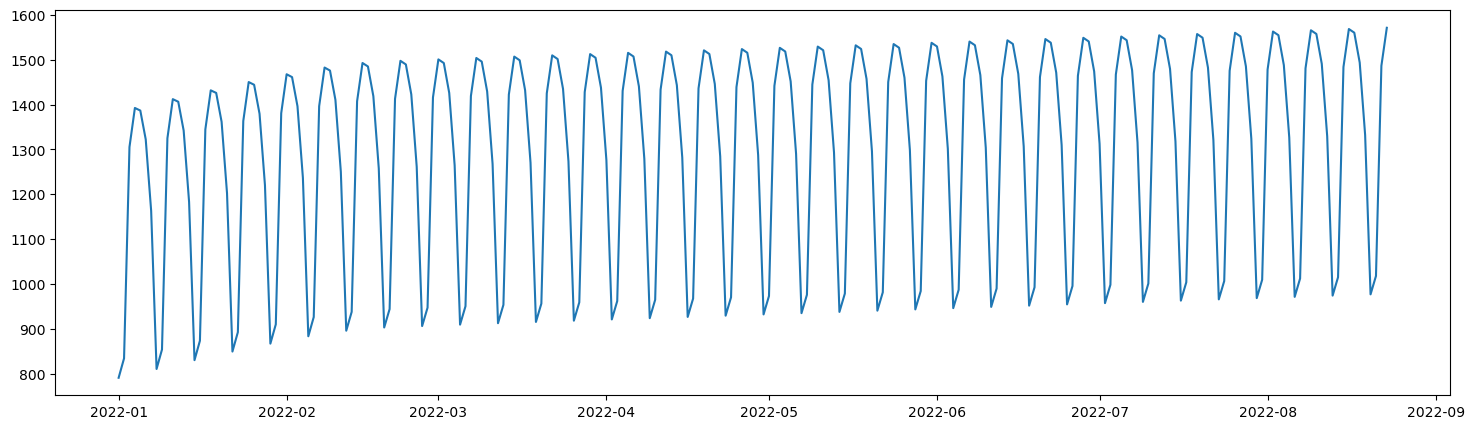

In [284]:
# forecast data - using trained model
#Plotting a graph of the forecast, showing monthly trend, the graph shows our forecast is accurate as it is similar to the trend in the original dataset
f, ax = plt.subplots(figsize=(18,5))
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [285]:
#date range from now till middle of next year

daterange = pd.date_range('15-01-2023', '30-06-2024', freq="D")
predDuration = len(daterange) #533
originalDuration = len(figmadata)
totDuration = (originalDuration + predDuration - predSize)

In [286]:
#Final prediction
#This forecast prediction of daily page views from now (15-01-2023) until middle of next year (30-06-2024)

pred_model = Prophet(daily_seasonality=True, seasonality_prior_scale=0.9)
pred_model.fit(figmadata)
future = pred_model.make_future_dataframe(periods=totDuration)
forecast = pred_model.predict(future)
pred_forecast = forecast.tail(predDuration)
pred_forecastt = forecast.tail(predDuration)
pred_forecast.set_index("ds", inplace = True)
pred_forecast.tail()

07:03:29 - cmdstanpy - INFO - Chain [1] start processing
07:03:29 - cmdstanpy - INFO - Chain [1] done processing


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2024-06-23,1674.805348,1270.467422,2186.973528,1214.476948,2108.578078,55.528326,55.528326,55.528326,423.431946,423.431946,423.431946,-367.903620,-367.903620,-367.903620,0.0,0.0,0.0,1730.333674
2024-06-24,1675.783582,1780.914120,2712.377820,1214.258998,2110.376248,573.585464,573.585464,573.585464,423.431946,423.431946,423.431946,150.153518,150.153518,150.153518,0.0,0.0,0.0,2249.369046
2024-06-25,1676.761816,1871.058069,2839.434048,1213.974167,2112.174419,680.477393,680.477393,680.477393,423.431946,423.431946,423.431946,257.045447,257.045447,257.045447,0.0,0.0,0.0,2357.239209
2024-06-26,1677.740050,1826.079546,2798.091496,1213.689337,2113.972590,641.674453,641.674453,641.674453,423.431946,423.431946,423.431946,218.242507,218.242507,218.242507,0.0,0.0,0.0,2319.414503
2024-06-27,1678.718284,1758.655603,2725.421980,1213.404506,2115.770761,563.646895,563.646895,563.646895,423.431946,423.431946,423.431946,140.214949,140.214949,140.214949,0.0,0.0,0.0,2242.365179


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


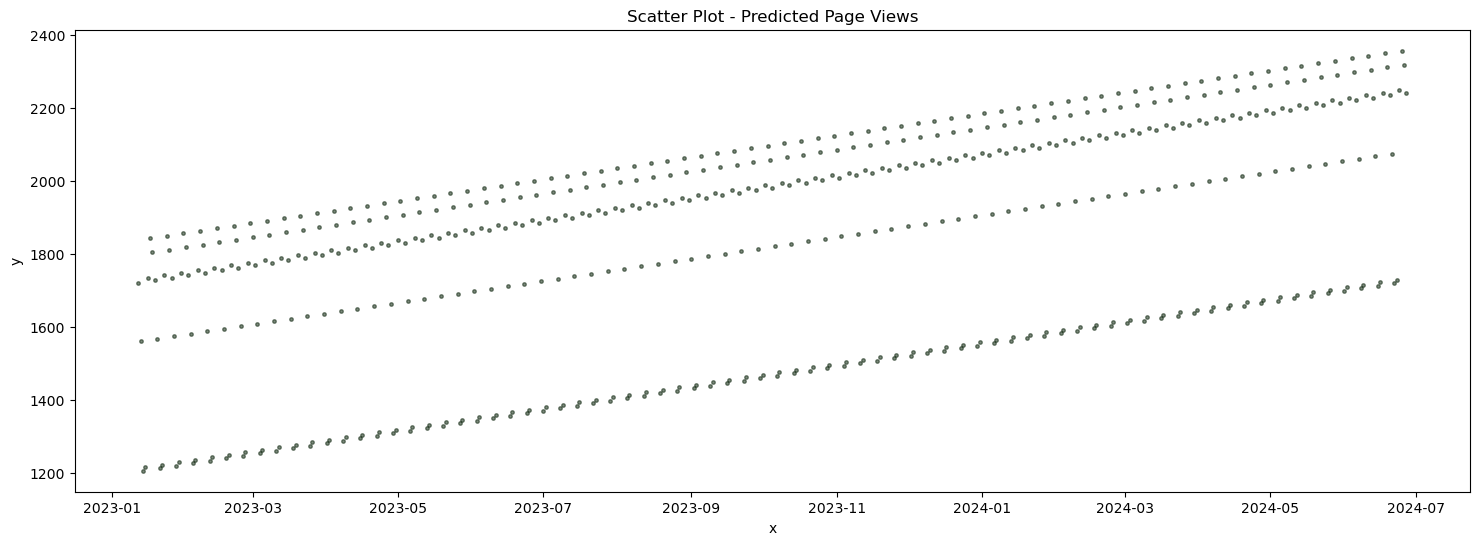

In [287]:
colors = (0,0.1,0)
area = npy.pi*2
f, ax = plt.subplots(figsize=(18,6))
plt.scatter(pred_forecast.index, pred_forecast['yhat'], s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot - Predicted Page Views')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


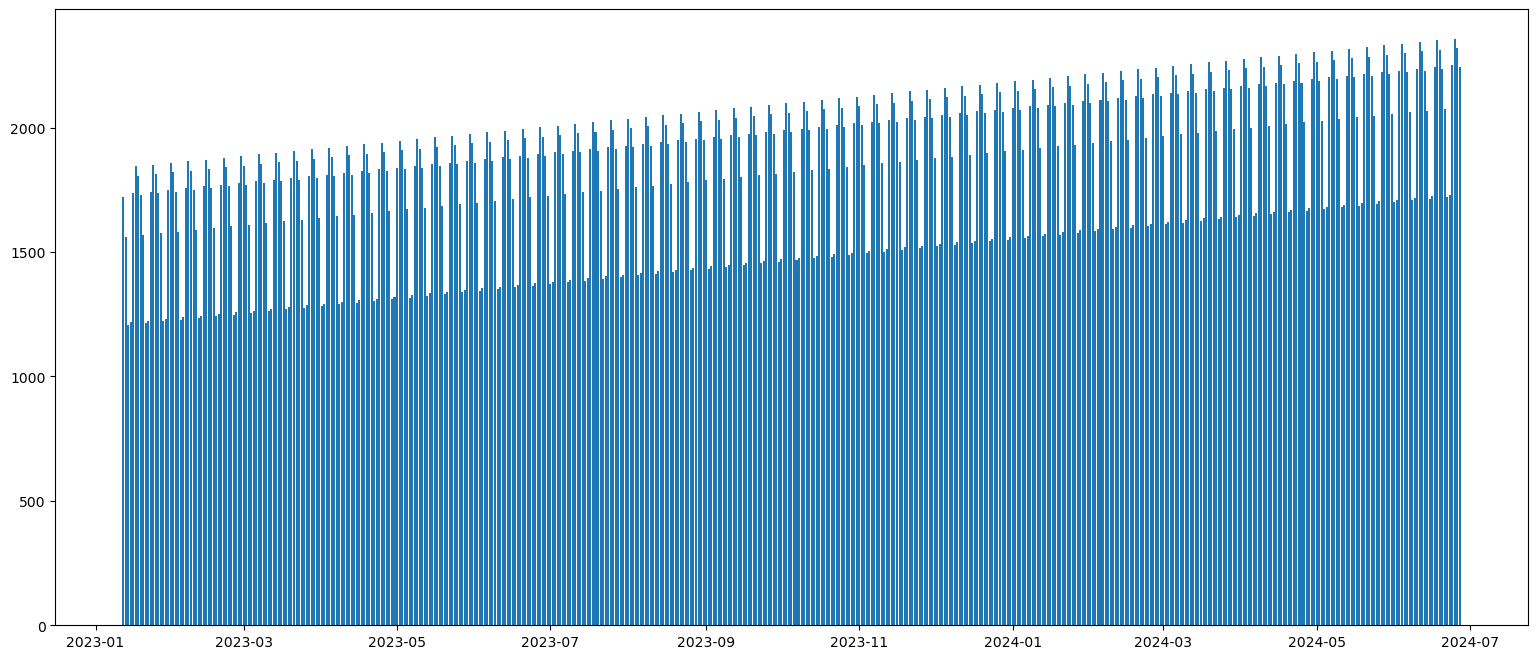

In [288]:
f, ax = plt.subplots(figsize=(19,8))
plt.bar(pred_forecast.index, pred_forecast['yhat'])
plt.show()

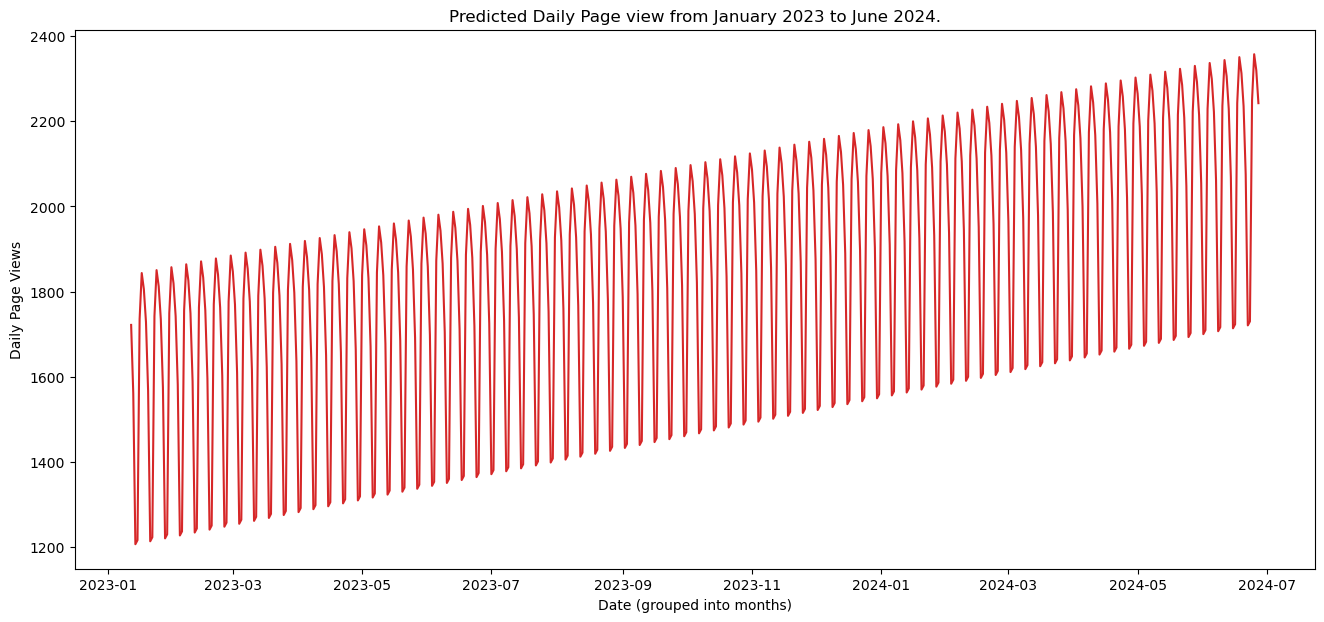

In [289]:
predViewz = pred_forecast['yhat'];
def plot_df(pred_forecast, x, y, title="", xlabel='Date (grouped into months)', ylabel="Daily Page Views", dpi=100):
    plt.figure(figsize=(16,7), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(pred_forecast, x=pred_forecast.index, y=predViewz, title='Predicted Daily Page view from January 2023 to June 2024.')

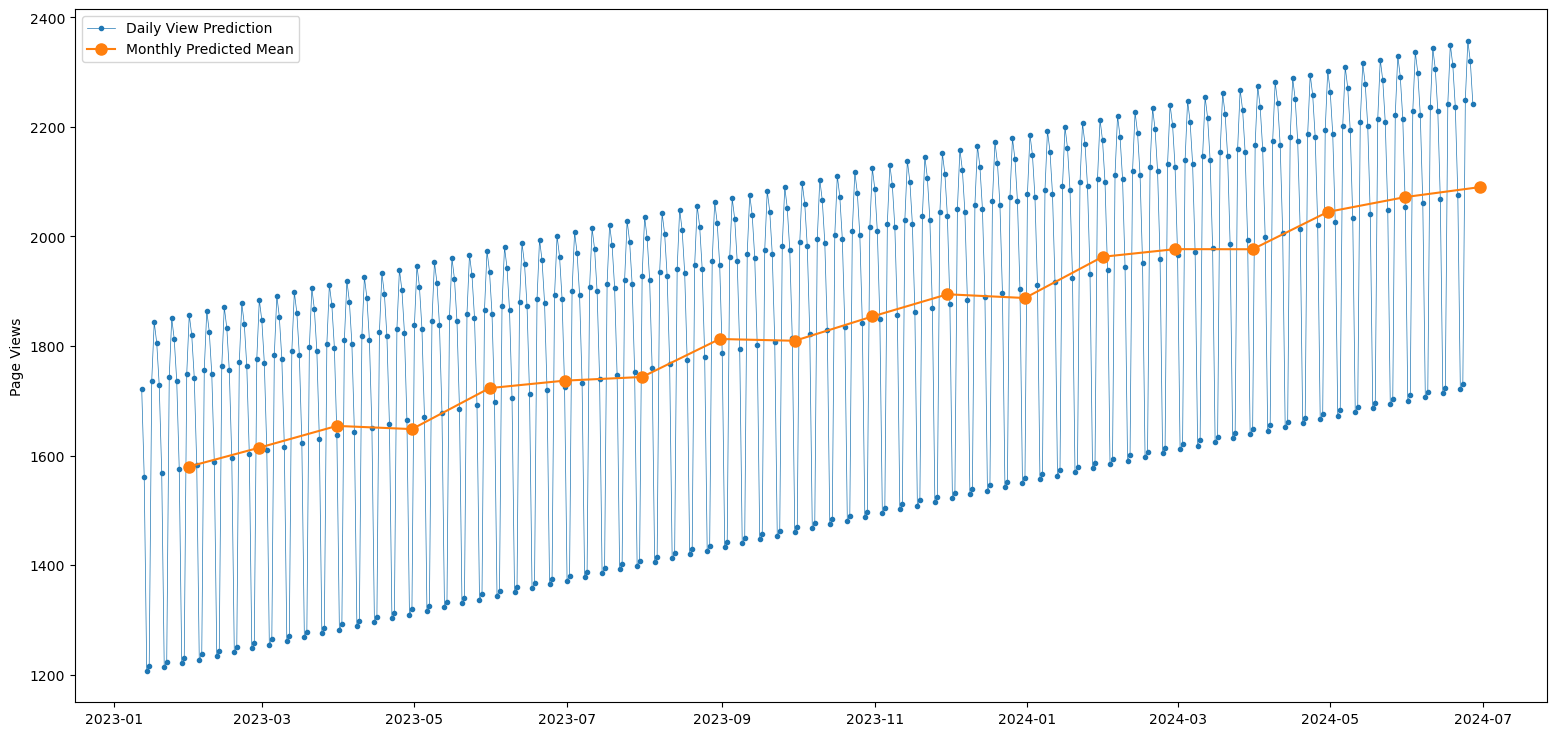

In [290]:
fig, ax = plt.subplots(figsize=(19, 9))
ax.plot(predViewz,marker='.', linestyle='-', linewidth=0.5, label='Daily View Prediction')
ax.plot(predViewz.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Predicted Mean')
ax.set_ylabel('Page Views')
ax.legend();

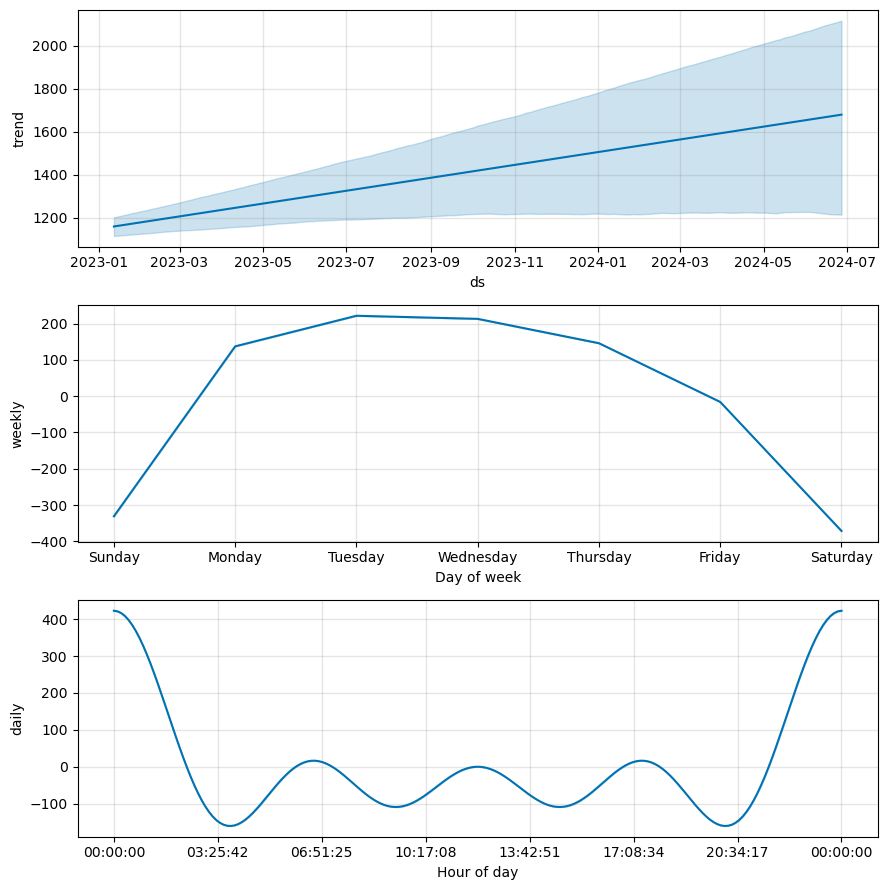

In [291]:
#I need to plot this graph to show the trend or progression of the page views monthly, daily and hourly
#We can see how the trend (page views) behaves, rising and falling depending on the visualizations shown in the graph below
#Graph 1 - Shows the predicted rise in views from the beginning of 2023 and peaks to 2024
#Graph 2 - Mondays to Thursdays show higher predicted page views while it declines on weekends
#Graph 3- Shows hourly view rates

tmodel.plot_components(pred_forecastt);